In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub_sample = pd.read_csv('Sample_Submission.csv')

In [3]:
# lets see in which format we need to submit
sub_sample.head()

,Loan_ID,Loan_Status


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test.shape

(367, 12)

In [8]:
# our target column in Loan_Status
# so convert it into 1,0 instead Y,N
train['Loan_Status'] = train['Loan_Status'].map({'Y':1, 'N':0})

In [9]:
# lets get basic Univariate insight
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

In [13]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

In [18]:
cat_cols = cat_cols.delete(0)

In [19]:
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [20]:
for e in cat_cols:
    print(e)
    print('***********')
    print(train[e].value_counts(normalize=True))
    print('\n')

Gender
***********
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


Married
***********
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


Dependents
***********
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


Education
***********
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


Self_Employed
***********
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


Property_Area
***********
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64




In [21]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [160]:
from scipy.stats import norm, lognorm, johnsonsu
from scipy.special import boxcox1p

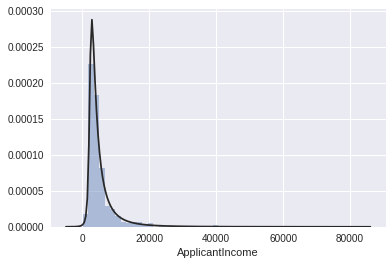

In [159]:
sns.distplot(train['ApplicantIncome'], kde=False)

/home/svc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


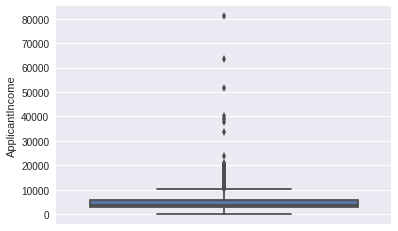

In [23]:
sns.boxplot(y=train['ApplicantIncome'])

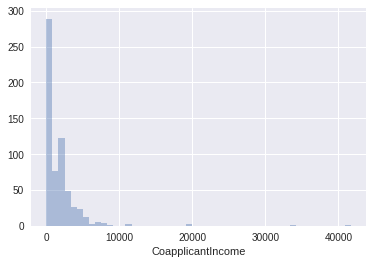

In [24]:
sns.distplot(train['CoapplicantIncome'], kde=False)

/home/svc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


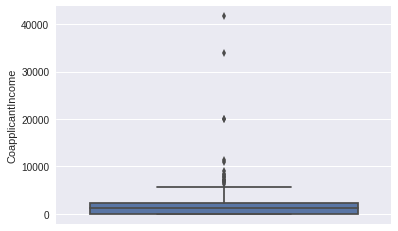

In [25]:
sns.boxplot(y=train['CoapplicantIncome'])

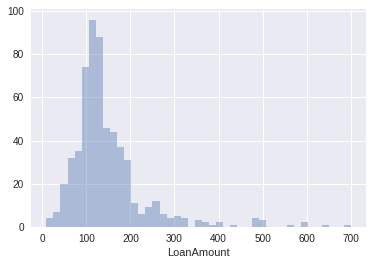

In [26]:
sns.distplot(train['LoanAmount'].dropna(), kde=False)

/home/svc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


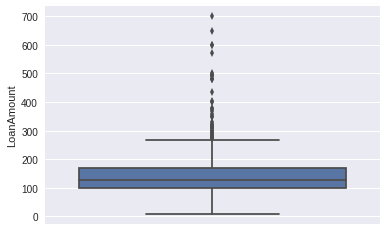

In [27]:
sns.boxplot(y=train['LoanAmount'])

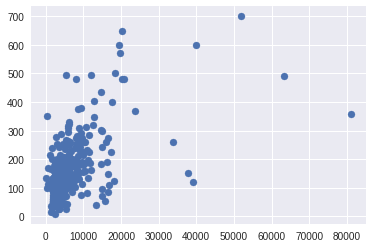

In [28]:
plt.scatter('ApplicantIncome','LoanAmount',data=train)

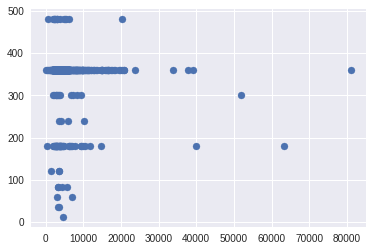

In [29]:
plt.scatter('ApplicantIncome','Loan_Amount_Term',data=train)

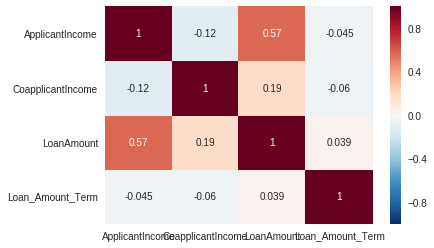

In [30]:
sns.heatmap(train[num_cols].drop(['Credit_History','Loan_Status'], axis=1).corr(), annot=True)

/home/svc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


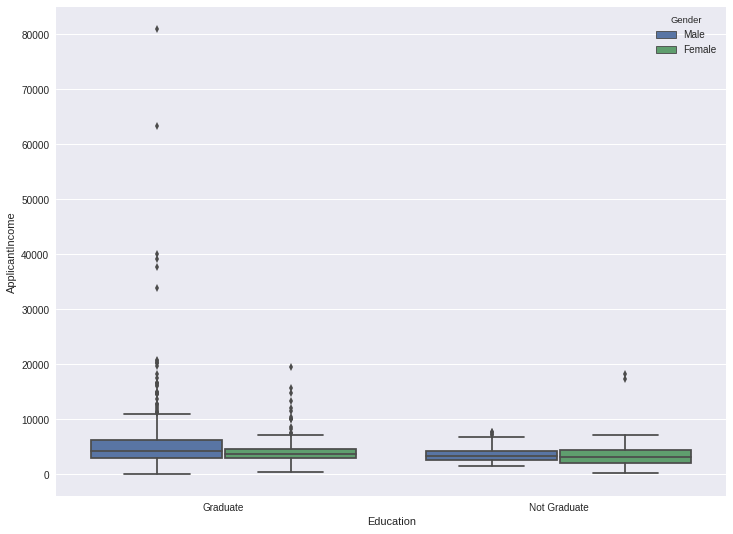

In [31]:
plt.subplots(figsize=(12,9))
sns.boxplot(x='Education', y='ApplicantIncome', hue='Gender', data=train)

In [32]:
train.groupby('Credit_History')['Loan_Status'].mean()

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [33]:
train.groupby(['Credit_History','Gender'])['Loan_Status'].mean()

Credit_History  Gender
0.0             Female    0.058824
                Male      0.086957
1.0             Female    0.761905
                Male      0.803665
Name: Loan_Status, dtype: float64

/home/svc/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


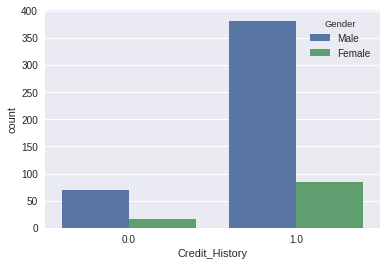

In [34]:
sns.countplot('Credit_History', hue='Gender', data=train)

In [38]:
y_train = train['Loan_Status']
train.drop('Loan_Status', axis=1, inplace=True)

In [47]:
full = pd.concat([train,test])

In [48]:
# Loan_ID is pretty unique and not making any sence, so it can be removed from both train and test
train_ID = train['Loan_ID']
test_ID = test['Loan_ID']
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

In [51]:
full.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [141]:
# Missing values
(full.isnull().sum()/full.isnull().count()).sort_values(ascending=False)

Property_Area        0.0
Credit_History       0.0
Loan_Amount_Term     0.0
LoanAmount           0.0
CoapplicantIncome    0.0
ApplicantIncome      0.0
Self_Employed        0.0
Education            0.0
Dependents           0.0
Married              0.0
Gender               0.0
Loan_ID              0.0
dtype: float64

In [112]:
full = full.reset_index(drop=True)

In [113]:
full['Married'].fillna(full['Married'].mode()[0], inplace=True)

In [114]:
full['Self_Employed'].fillna(full['Self_Employed'].mode()[0], inplace=True)

In [115]:
full['Credit_History'].fillna(full['Credit_History'].mode()[0], inplace=True)

In [116]:
full.groupby(['Education', 'Self_Employed'])['LoanAmount'].median()

Education     Self_Employed
Graduate      No               130.0
              Yes              150.0
Not Graduate  No               117.0
              Yes              130.0
Name: LoanAmount, dtype: float64

In [117]:
full['LoanAmount'] = full.groupby(['Education', 'Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

In [124]:
full['Loan_Amount_Term'].fillna(full['Loan_Amount_Term'].mode()[0], inplace=True)

In [127]:
full['Gender'].fillna('Male', inplace=True)

In [146]:
full['Dependents'].fillna('0',  inplace=True)
full['Dependents'] = full['Dependents'].apply(str)

In [134]:
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [148]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
full['Dependents'] = l.fit_transform(full['Dependents'])

In [162]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [170]:
lam = 0.15
full['ApplicantIncome'] = boxcox1p(full['ApplicantIncome'], lam)
full['CoapplicantIncome'] = boxcox1p(full['CoapplicantIncome'], lam)
full['LoanAmount'] = boxcox1p(full['LoanAmount'], lam)

In [173]:
full['Loan_Amount_Term'] = full['Loan_Amount_Term']/12

In [177]:
full['TotalIncome'] = full['ApplicantIncome'] + full['CoapplicantIncome']

In [178]:
full['repay'] = full['LoanAmount']/full['TotalIncome']

In [181]:
full

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,repay
0,LP001002,Male,No,0,Graduate,No,17.822958,0.000000,7.184917,30.0,1.0,Urban,17.822958,0.403127
1,LP001003,Male,Yes,1,Graduate,No,16.943303,13.318700,7.152988,30.0,1.0,Rural,30.262003,0.236369
2,LP001005,Male,Yes,0,Graduate,Yes,15.489705,0.000000,5.859551,30.0,1.0,Urban,15.489705,0.378287
3,LP001006,Male,Yes,0,Not Graduate,No,14.998030,14.703993,7.020909,30.0,1.0,Urban,29.702023,0.236378
4,LP001008,Male,No,0,Graduate,No,17.916752,0.000000,7.353462,30.0,1.0,Urban,17.916752,0.410424
5,LP001011,Male,Yes,2,Graduate,Yes,17.542765,16.632993,8.754916,30.0,1.0,Urban,34.175758,0.256173
6,LP001013,Male,Yes,0,Not Graduate,No,14.669867,13.334558,6.553880,30.0,1.0,Urban,28.004425,0.234030
7,LP001014,Male,Yes,3,Graduate,No,15.529371,14.897362,7.593293,30.0,0.0,Semiurban,30.426733,0.249560
8,LP001018,Male,Yes,2,Graduate,No,16.471644,13.354279,7.724359,30.0,1.0,Urban,29.825923,0.258981
9,LP001020,Male,Yes,1,Graduate,No,20.888538,20.244579,9.384956,30.0,1.0,Semiurban,41.133117,0.228161


In [182]:
f_train = full[full['Loan_ID'].isin(train_ID)]
f_test = full[full['Loan_ID'].isin(test_ID)]

In [184]:
f_train = pd.get_dummies(f_train.drop('Loan_ID', axis=1))

In [185]:
f_test = pd.get_dummies(f_test.drop('Loan_ID', axis=1))

In [188]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [195]:
from sklearn.model_selection import KFold, cross_val_score

In [206]:
#Validation function
n_folds = 5

def acc_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(f_train.values)
    acc = cross_val_score(model, f_train.values, y_train, scoring="accuracy", cv = kf)
    return(acc.mean())

In [193]:
gb_model = XGBClassifier()
r_model = RandomForestClassifier()
l_model = LGBMClassifier()
ca_model = CatBoostClassifier()

In [207]:
acc_cv(gb_model)

0.79328397673188789

In [208]:
acc_cv(r_model)

0.76893178212585933

In [209]:
acc_cv(l_model)

0.77384981491274452

In [210]:
acc_cv(ca_model)

0:	learn: 0.6785659	total: 7.97ms	remaining: 7.96s
1:	learn: 0.6651791	total: 13.8ms	remaining: 6.91s
2:	learn: 0.6528582	total: 21.1ms	remaining: 7.02s
3:	learn: 0.6401364	total: 25.5ms	remaining: 6.36s
4:	learn: 0.6279431	total: 30.2ms	remaining: 6.02s
5:	learn: 0.6144044	total: 36.8ms	remaining: 6.1s
6:	learn: 0.6048471	total: 39.3ms	remaining: 5.58s
7:	learn: 0.5961518	total: 41.1ms	remaining: 5.1s
8:	learn: 0.5865622	total: 44.8ms	remaining: 4.93s
9:	learn: 0.5786425	total: 47.8ms	remaining: 4.73s
10:	learn: 0.5701673	total: 52.9ms	remaining: 4.75s
11:	learn: 0.5626378	total: 56.5ms	remaining: 4.65s
12:	learn: 0.5556663	total: 58.6ms	remaining: 4.45s
13:	learn: 0.5489793	total: 61.8ms	remaining: 4.35s
14:	learn: 0.5425947	total: 65.4ms	remaining: 4.3s
15:	learn: 0.5375680	total: 67.3ms	remaining: 4.14s
16:	learn: 0.5326661	total: 69.3ms	remaining: 4.01s
17:	learn: 0.5271296	total: 72.6ms	remaining: 3.96s
18:	learn: 0.5229999	total: 74.4ms	remaining: 3.84s
19:	learn: 0.5186542	tota

209:	learn: 0.2722173	total: 789ms	remaining: 2.97s
210:	learn: 0.2717380	total: 794ms	remaining: 2.97s
211:	learn: 0.2707383	total: 798ms	remaining: 2.96s
212:	learn: 0.2695877	total: 806ms	remaining: 2.98s
213:	learn: 0.2692720	total: 809ms	remaining: 2.97s
214:	learn: 0.2687814	total: 814ms	remaining: 2.97s
215:	learn: 0.2680401	total: 820ms	remaining: 2.98s
216:	learn: 0.2676050	total: 824ms	remaining: 2.97s
217:	learn: 0.2670817	total: 827ms	remaining: 2.97s
218:	learn: 0.2667047	total: 831ms	remaining: 2.96s
219:	learn: 0.2657101	total: 836ms	remaining: 2.96s
220:	learn: 0.2650863	total: 841ms	remaining: 2.96s
221:	learn: 0.2639393	total: 845ms	remaining: 2.96s
222:	learn: 0.2634012	total: 849ms	remaining: 2.96s
223:	learn: 0.2625167	total: 853ms	remaining: 2.95s
224:	learn: 0.2615175	total: 856ms	remaining: 2.95s
225:	learn: 0.2612089	total: 859ms	remaining: 2.94s
226:	learn: 0.2602440	total: 863ms	remaining: 2.94s
227:	learn: 0.2599283	total: 867ms	remaining: 2.93s
228:	learn: 

398:	learn: 0.1715112	total: 1.58s	remaining: 2.38s
399:	learn: 0.1713327	total: 1.58s	remaining: 2.38s
400:	learn: 0.1709761	total: 1.59s	remaining: 2.38s
401:	learn: 0.1707831	total: 1.59s	remaining: 2.37s
402:	learn: 0.1703471	total: 1.6s	remaining: 2.37s
403:	learn: 0.1700085	total: 1.61s	remaining: 2.37s
404:	learn: 0.1695471	total: 1.61s	remaining: 2.37s
405:	learn: 0.1692895	total: 1.62s	remaining: 2.36s
406:	learn: 0.1689358	total: 1.62s	remaining: 2.36s
407:	learn: 0.1686017	total: 1.62s	remaining: 2.36s
408:	learn: 0.1684794	total: 1.63s	remaining: 2.35s
409:	learn: 0.1680738	total: 1.63s	remaining: 2.35s
410:	learn: 0.1674547	total: 1.64s	remaining: 2.35s
411:	learn: 0.1671199	total: 1.64s	remaining: 2.34s
412:	learn: 0.1665000	total: 1.65s	remaining: 2.34s
413:	learn: 0.1661818	total: 1.65s	remaining: 2.33s
414:	learn: 0.1659295	total: 1.65s	remaining: 2.33s
415:	learn: 0.1657914	total: 1.66s	remaining: 2.33s
416:	learn: 0.1651611	total: 1.66s	remaining: 2.32s
417:	learn: 0

595:	learn: 0.1151334	total: 2.36s	remaining: 1.6s
596:	learn: 0.1148977	total: 2.36s	remaining: 1.59s
597:	learn: 0.1146121	total: 2.37s	remaining: 1.59s
598:	learn: 0.1144430	total: 2.37s	remaining: 1.59s
599:	learn: 0.1141342	total: 2.38s	remaining: 1.58s
600:	learn: 0.1138141	total: 2.38s	remaining: 1.58s
601:	learn: 0.1137249	total: 2.39s	remaining: 1.58s
602:	learn: 0.1136113	total: 2.39s	remaining: 1.57s
603:	learn: 0.1133340	total: 2.4s	remaining: 1.57s
604:	learn: 0.1132162	total: 2.4s	remaining: 1.57s
605:	learn: 0.1129786	total: 2.4s	remaining: 1.56s
606:	learn: 0.1129181	total: 2.41s	remaining: 1.56s
607:	learn: 0.1128288	total: 2.41s	remaining: 1.55s
608:	learn: 0.1126480	total: 2.42s	remaining: 1.55s
609:	learn: 0.1124236	total: 2.42s	remaining: 1.55s
610:	learn: 0.1122410	total: 2.42s	remaining: 1.54s
611:	learn: 0.1118690	total: 2.43s	remaining: 1.54s
612:	learn: 0.1117665	total: 2.43s	remaining: 1.53s
613:	learn: 0.1115776	total: 2.43s	remaining: 1.53s
614:	learn: 0.11

800:	learn: 0.0809625	total: 3.15s	remaining: 782ms
801:	learn: 0.0808157	total: 3.15s	remaining: 779ms
802:	learn: 0.0807701	total: 3.16s	remaining: 775ms
803:	learn: 0.0807202	total: 3.16s	remaining: 771ms
804:	learn: 0.0805952	total: 3.17s	remaining: 768ms
805:	learn: 0.0804057	total: 3.17s	remaining: 764ms
806:	learn: 0.0802135	total: 3.18s	remaining: 761ms
807:	learn: 0.0801370	total: 3.18s	remaining: 757ms
808:	learn: 0.0799861	total: 3.19s	remaining: 753ms
809:	learn: 0.0797719	total: 3.19s	remaining: 749ms
810:	learn: 0.0796520	total: 3.2s	remaining: 745ms
811:	learn: 0.0793014	total: 3.2s	remaining: 741ms
812:	learn: 0.0792094	total: 3.21s	remaining: 737ms
813:	learn: 0.0790855	total: 3.21s	remaining: 733ms
814:	learn: 0.0790205	total: 3.21s	remaining: 729ms
815:	learn: 0.0788332	total: 3.22s	remaining: 725ms
816:	learn: 0.0787508	total: 3.22s	remaining: 721ms
817:	learn: 0.0786751	total: 3.22s	remaining: 717ms
818:	learn: 0.0786245	total: 3.23s	remaining: 713ms
819:	learn: 0.

0:	learn: 0.6757186	total: 12.4ms	remaining: 12.4s
1:	learn: 0.6600883	total: 19.9ms	remaining: 9.94s
2:	learn: 0.6456141	total: 31.5ms	remaining: 10.5s
3:	learn: 0.6294244	total: 43.6ms	remaining: 10.9s
4:	learn: 0.6178109	total: 51.3ms	remaining: 10.2s
5:	learn: 0.6057968	total: 58.9ms	remaining: 9.76s
6:	learn: 0.5949720	total: 67.6ms	remaining: 9.59s
7:	learn: 0.5840624	total: 79.5ms	remaining: 9.86s
8:	learn: 0.5743904	total: 91.9ms	remaining: 10.1s
9:	learn: 0.5658002	total: 101ms	remaining: 9.96s
10:	learn: 0.5561444	total: 111ms	remaining: 9.97s
11:	learn: 0.5490542	total: 115ms	remaining: 9.45s
12:	learn: 0.5423866	total: 118ms	remaining: 8.98s
13:	learn: 0.5362917	total: 122ms	remaining: 8.59s
14:	learn: 0.5282590	total: 127ms	remaining: 8.37s
15:	learn: 0.5209607	total: 131ms	remaining: 8.08s
16:	learn: 0.5156214	total: 135ms	remaining: 7.78s
17:	learn: 0.5098842	total: 137ms	remaining: 7.49s
18:	learn: 0.5055110	total: 140ms	remaining: 7.22s
19:	learn: 0.5006661	total: 142m

204:	learn: 0.2912981	total: 793ms	remaining: 3.08s
205:	learn: 0.2908758	total: 798ms	remaining: 3.07s
206:	learn: 0.2902964	total: 802ms	remaining: 3.07s
207:	learn: 0.2896244	total: 806ms	remaining: 3.07s
208:	learn: 0.2882514	total: 810ms	remaining: 3.06s
209:	learn: 0.2877278	total: 814ms	remaining: 3.06s
210:	learn: 0.2872646	total: 819ms	remaining: 3.06s
211:	learn: 0.2866909	total: 825ms	remaining: 3.07s
212:	learn: 0.2860387	total: 832ms	remaining: 3.08s
213:	learn: 0.2849479	total: 836ms	remaining: 3.07s
214:	learn: 0.2844832	total: 839ms	remaining: 3.06s
215:	learn: 0.2836569	total: 843ms	remaining: 3.06s
216:	learn: 0.2833933	total: 847ms	remaining: 3.06s
217:	learn: 0.2830861	total: 850ms	remaining: 3.05s
218:	learn: 0.2826208	total: 854ms	remaining: 3.04s
219:	learn: 0.2822319	total: 857ms	remaining: 3.04s
220:	learn: 0.2820084	total: 861ms	remaining: 3.03s
221:	learn: 0.2813832	total: 864ms	remaining: 3.03s
222:	learn: 0.2808883	total: 867ms	remaining: 3.02s
223:	learn: 

409:	learn: 0.1873770	total: 1.57s	remaining: 2.26s
410:	learn: 0.1869546	total: 1.57s	remaining: 2.26s
411:	learn: 0.1865006	total: 1.58s	remaining: 2.25s
412:	learn: 0.1862462	total: 1.58s	remaining: 2.25s
413:	learn: 0.1858407	total: 1.59s	remaining: 2.25s
414:	learn: 0.1850631	total: 1.59s	remaining: 2.25s
415:	learn: 0.1846302	total: 1.6s	remaining: 2.25s
416:	learn: 0.1844204	total: 1.6s	remaining: 2.24s
417:	learn: 0.1837118	total: 1.61s	remaining: 2.24s
418:	learn: 0.1833475	total: 1.61s	remaining: 2.24s
419:	learn: 0.1830496	total: 1.62s	remaining: 2.23s
420:	learn: 0.1828133	total: 1.62s	remaining: 2.23s
421:	learn: 0.1825904	total: 1.62s	remaining: 2.22s
422:	learn: 0.1823945	total: 1.63s	remaining: 2.22s
423:	learn: 0.1822133	total: 1.63s	remaining: 2.22s
424:	learn: 0.1819816	total: 1.64s	remaining: 2.21s
425:	learn: 0.1814305	total: 1.64s	remaining: 2.21s
426:	learn: 0.1810325	total: 1.64s	remaining: 2.2s
427:	learn: 0.1807381	total: 1.65s	remaining: 2.2s
428:	learn: 0.18

613:	learn: 0.1307118	total: 2.35s	remaining: 1.48s
614:	learn: 0.1306562	total: 2.35s	remaining: 1.47s
615:	learn: 0.1304529	total: 2.36s	remaining: 1.47s
616:	learn: 0.1299835	total: 2.36s	remaining: 1.47s
617:	learn: 0.1298739	total: 2.37s	remaining: 1.46s
618:	learn: 0.1297551	total: 2.37s	remaining: 1.46s
619:	learn: 0.1296343	total: 2.38s	remaining: 1.46s
620:	learn: 0.1294216	total: 2.38s	remaining: 1.45s
621:	learn: 0.1292514	total: 2.39s	remaining: 1.45s
622:	learn: 0.1291425	total: 2.39s	remaining: 1.45s
623:	learn: 0.1289932	total: 2.4s	remaining: 1.44s
624:	learn: 0.1287099	total: 2.4s	remaining: 1.44s
625:	learn: 0.1284623	total: 2.4s	remaining: 1.44s
626:	learn: 0.1282346	total: 2.41s	remaining: 1.43s
627:	learn: 0.1280287	total: 2.41s	remaining: 1.43s
628:	learn: 0.1279438	total: 2.42s	remaining: 1.42s
629:	learn: 0.1276862	total: 2.42s	remaining: 1.42s
630:	learn: 0.1274144	total: 2.42s	remaining: 1.42s
631:	learn: 0.1272756	total: 2.42s	remaining: 1.41s
632:	learn: 0.1

818:	learn: 0.0961977	total: 3.13s	remaining: 693ms
819:	learn: 0.0960670	total: 3.14s	remaining: 689ms
820:	learn: 0.0959793	total: 3.14s	remaining: 686ms
821:	learn: 0.0959262	total: 3.15s	remaining: 682ms
822:	learn: 0.0958769	total: 3.15s	remaining: 679ms
823:	learn: 0.0957952	total: 3.16s	remaining: 675ms
824:	learn: 0.0957130	total: 3.17s	remaining: 671ms
825:	learn: 0.0954698	total: 3.17s	remaining: 668ms
826:	learn: 0.0954152	total: 3.17s	remaining: 664ms
827:	learn: 0.0953695	total: 3.18s	remaining: 660ms
828:	learn: 0.0950715	total: 3.18s	remaining: 656ms
829:	learn: 0.0949845	total: 3.18s	remaining: 652ms
830:	learn: 0.0948084	total: 3.19s	remaining: 649ms
831:	learn: 0.0947640	total: 3.19s	remaining: 645ms
832:	learn: 0.0946281	total: 3.2s	remaining: 641ms
833:	learn: 0.0945607	total: 3.2s	remaining: 637ms
834:	learn: 0.0943736	total: 3.2s	remaining: 633ms
835:	learn: 0.0942115	total: 3.21s	remaining: 629ms
836:	learn: 0.0941327	total: 3.21s	remaining: 625ms
837:	learn: 0.0

0:	learn: 0.6763585	total: 11.9ms	remaining: 11.9s
1:	learn: 0.6613478	total: 26ms	remaining: 13s
2:	learn: 0.6464318	total: 38.4ms	remaining: 12.8s
3:	learn: 0.6333925	total: 50.4ms	remaining: 12.6s
4:	learn: 0.6221412	total: 57.3ms	remaining: 11.4s
5:	learn: 0.6098352	total: 68.4ms	remaining: 11.3s
6:	learn: 0.6000732	total: 77.5ms	remaining: 11s
7:	learn: 0.5893400	total: 89.2ms	remaining: 11.1s
8:	learn: 0.5799555	total: 112ms	remaining: 12.3s
9:	learn: 0.5723032	total: 117ms	remaining: 11.6s
10:	learn: 0.5640381	total: 123ms	remaining: 11s
11:	learn: 0.5564696	total: 127ms	remaining: 10.5s
12:	learn: 0.5502819	total: 130ms	remaining: 9.87s
13:	learn: 0.5424037	total: 134ms	remaining: 9.47s
14:	learn: 0.5357245	total: 139ms	remaining: 9.11s
15:	learn: 0.5303137	total: 142ms	remaining: 8.7s
16:	learn: 0.5256552	total: 144ms	remaining: 8.3s
17:	learn: 0.5211409	total: 146ms	remaining: 7.96s
18:	learn: 0.5158203	total: 149ms	remaining: 7.71s
19:	learn: 0.5100987	total: 153ms	remaining

185:	learn: 0.3018654	total: 792ms	remaining: 3.47s
186:	learn: 0.3007181	total: 797ms	remaining: 3.47s
187:	learn: 0.2995611	total: 802ms	remaining: 3.46s
188:	learn: 0.2989789	total: 807ms	remaining: 3.46s
189:	learn: 0.2985929	total: 812ms	remaining: 3.46s
190:	learn: 0.2979763	total: 817ms	remaining: 3.46s
191:	learn: 0.2973398	total: 823ms	remaining: 3.46s
192:	learn: 0.2966033	total: 828ms	remaining: 3.46s
193:	learn: 0.2962017	total: 832ms	remaining: 3.46s
194:	learn: 0.2952487	total: 836ms	remaining: 3.45s
195:	learn: 0.2943352	total: 840ms	remaining: 3.44s
196:	learn: 0.2936605	total: 843ms	remaining: 3.44s
197:	learn: 0.2930917	total: 847ms	remaining: 3.43s
198:	learn: 0.2923730	total: 850ms	remaining: 3.42s
199:	learn: 0.2916372	total: 854ms	remaining: 3.42s
200:	learn: 0.2909957	total: 858ms	remaining: 3.41s
201:	learn: 0.2901247	total: 862ms	remaining: 3.4s
202:	learn: 0.2895601	total: 866ms	remaining: 3.4s
203:	learn: 0.2891002	total: 870ms	remaining: 3.39s
204:	learn: 0.

355:	learn: 0.2127002	total: 1.58s	remaining: 2.85s
356:	learn: 0.2123821	total: 1.58s	remaining: 2.85s
357:	learn: 0.2121657	total: 1.59s	remaining: 2.85s
358:	learn: 0.2119569	total: 1.59s	remaining: 2.85s
359:	learn: 0.2117796	total: 1.6s	remaining: 2.85s
360:	learn: 0.2113819	total: 1.6s	remaining: 2.84s
361:	learn: 0.2110955	total: 1.61s	remaining: 2.84s
362:	learn: 0.2110519	total: 1.62s	remaining: 2.84s
363:	learn: 0.2106777	total: 1.62s	remaining: 2.83s
364:	learn: 0.2103448	total: 1.63s	remaining: 2.83s
365:	learn: 0.2098147	total: 1.63s	remaining: 2.83s
366:	learn: 0.2093698	total: 1.64s	remaining: 2.82s
367:	learn: 0.2091961	total: 1.64s	remaining: 2.82s
368:	learn: 0.2090617	total: 1.65s	remaining: 2.81s
369:	learn: 0.2083165	total: 1.65s	remaining: 2.81s
370:	learn: 0.2078564	total: 1.66s	remaining: 2.81s
371:	learn: 0.2072677	total: 1.66s	remaining: 2.8s
372:	learn: 0.2070808	total: 1.67s	remaining: 2.8s
373:	learn: 0.2061819	total: 1.67s	remaining: 2.79s
374:	learn: 0.20

537:	learn: 0.1567513	total: 2.36s	remaining: 2.03s
538:	learn: 0.1566198	total: 2.37s	remaining: 2.03s
539:	learn: 0.1562159	total: 2.38s	remaining: 2.02s
540:	learn: 0.1559817	total: 2.38s	remaining: 2.02s
541:	learn: 0.1557200	total: 2.39s	remaining: 2.02s
542:	learn: 0.1553754	total: 2.39s	remaining: 2.01s
543:	learn: 0.1552109	total: 2.4s	remaining: 2.01s
544:	learn: 0.1548200	total: 2.4s	remaining: 2.01s
545:	learn: 0.1544454	total: 2.41s	remaining: 2s
546:	learn: 0.1541051	total: 2.42s	remaining: 2s
547:	learn: 0.1539188	total: 2.43s	remaining: 2s
548:	learn: 0.1535019	total: 2.43s	remaining: 2s
549:	learn: 0.1531943	total: 2.44s	remaining: 1.99s
550:	learn: 0.1529284	total: 2.44s	remaining: 1.99s
551:	learn: 0.1527273	total: 2.45s	remaining: 1.99s
552:	learn: 0.1526489	total: 2.46s	remaining: 1.98s
553:	learn: 0.1525080	total: 2.46s	remaining: 1.98s
554:	learn: 0.1522631	total: 2.46s	remaining: 1.98s
555:	learn: 0.1519826	total: 2.47s	remaining: 1.97s
556:	learn: 0.1518260	tota

708:	learn: 0.1195932	total: 3.16s	remaining: 1.3s
709:	learn: 0.1193708	total: 3.16s	remaining: 1.29s
710:	learn: 0.1192455	total: 3.17s	remaining: 1.29s
711:	learn: 0.1189890	total: 3.17s	remaining: 1.28s
712:	learn: 0.1189140	total: 3.18s	remaining: 1.28s
713:	learn: 0.1187256	total: 3.19s	remaining: 1.28s
714:	learn: 0.1184894	total: 3.19s	remaining: 1.27s
715:	learn: 0.1181917	total: 3.2s	remaining: 1.27s
716:	learn: 0.1180365	total: 3.21s	remaining: 1.26s
717:	learn: 0.1177723	total: 3.22s	remaining: 1.26s
718:	learn: 0.1176664	total: 3.22s	remaining: 1.26s
719:	learn: 0.1175676	total: 3.23s	remaining: 1.25s
720:	learn: 0.1174553	total: 3.23s	remaining: 1.25s
721:	learn: 0.1173092	total: 3.24s	remaining: 1.25s
722:	learn: 0.1171608	total: 3.25s	remaining: 1.24s
723:	learn: 0.1170047	total: 3.25s	remaining: 1.24s
724:	learn: 0.1168772	total: 3.26s	remaining: 1.24s
725:	learn: 0.1165521	total: 3.26s	remaining: 1.23s
726:	learn: 0.1163611	total: 3.27s	remaining: 1.23s
727:	learn: 0.

914:	learn: 0.0906142	total: 4.14s	remaining: 385ms
915:	learn: 0.0905029	total: 4.14s	remaining: 380ms
916:	learn: 0.0901964	total: 4.15s	remaining: 376ms
917:	learn: 0.0901555	total: 4.15s	remaining: 371ms
918:	learn: 0.0900579	total: 4.16s	remaining: 366ms
919:	learn: 0.0899021	total: 4.16s	remaining: 362ms
920:	learn: 0.0898452	total: 4.16s	remaining: 357ms
921:	learn: 0.0898192	total: 4.17s	remaining: 352ms
922:	learn: 0.0896806	total: 4.17s	remaining: 348ms
923:	learn: 0.0895729	total: 4.17s	remaining: 343ms
924:	learn: 0.0894771	total: 4.18s	remaining: 339ms
925:	learn: 0.0894319	total: 4.18s	remaining: 334ms
926:	learn: 0.0893719	total: 4.18s	remaining: 330ms
927:	learn: 0.0892623	total: 4.19s	remaining: 325ms
928:	learn: 0.0890762	total: 4.19s	remaining: 320ms
929:	learn: 0.0890452	total: 4.2s	remaining: 316ms
930:	learn: 0.0889873	total: 4.2s	remaining: 311ms
931:	learn: 0.0889251	total: 4.2s	remaining: 307ms
932:	learn: 0.0887965	total: 4.21s	remaining: 302ms
933:	learn: 0.0

103:	learn: 0.3839867	total: 428ms	remaining: 3.69s
104:	learn: 0.3830494	total: 434ms	remaining: 3.7s
105:	learn: 0.3811699	total: 437ms	remaining: 3.69s
106:	learn: 0.3798297	total: 441ms	remaining: 3.68s
107:	learn: 0.3794988	total: 443ms	remaining: 3.66s
108:	learn: 0.3784290	total: 447ms	remaining: 3.65s
109:	learn: 0.3767033	total: 451ms	remaining: 3.65s
110:	learn: 0.3754231	total: 454ms	remaining: 3.64s
111:	learn: 0.3751982	total: 456ms	remaining: 3.62s
112:	learn: 0.3739566	total: 461ms	remaining: 3.62s
113:	learn: 0.3737506	total: 464ms	remaining: 3.6s
114:	learn: 0.3723208	total: 467ms	remaining: 3.6s
115:	learn: 0.3709580	total: 471ms	remaining: 3.59s
116:	learn: 0.3701186	total: 474ms	remaining: 3.58s
117:	learn: 0.3694991	total: 478ms	remaining: 3.57s
118:	learn: 0.3685125	total: 481ms	remaining: 3.56s
119:	learn: 0.3678892	total: 485ms	remaining: 3.56s
120:	learn: 0.3669762	total: 489ms	remaining: 3.55s
121:	learn: 0.3660560	total: 493ms	remaining: 3.55s
122:	learn: 0.3

262:	learn: 0.2648277	total: 1.02s	remaining: 2.85s
263:	learn: 0.2642255	total: 1.02s	remaining: 2.85s
264:	learn: 0.2636945	total: 1.02s	remaining: 2.84s
265:	learn: 0.2627962	total: 1.03s	remaining: 2.84s
266:	learn: 0.2624647	total: 1.03s	remaining: 2.83s
267:	learn: 0.2619927	total: 1.03s	remaining: 2.83s
268:	learn: 0.2618100	total: 1.04s	remaining: 2.82s
269:	learn: 0.2615959	total: 1.04s	remaining: 2.82s
270:	learn: 0.2612622	total: 1.05s	remaining: 2.81s
271:	learn: 0.2608765	total: 1.05s	remaining: 2.81s
272:	learn: 0.2605421	total: 1.05s	remaining: 2.81s
273:	learn: 0.2597770	total: 1.06s	remaining: 2.8s
274:	learn: 0.2592619	total: 1.06s	remaining: 2.8s
275:	learn: 0.2590011	total: 1.06s	remaining: 2.79s
276:	learn: 0.2581383	total: 1.07s	remaining: 2.79s
277:	learn: 0.2576659	total: 1.07s	remaining: 2.78s
278:	learn: 0.2572360	total: 1.07s	remaining: 2.78s
279:	learn: 0.2568013	total: 1.08s	remaining: 2.77s
280:	learn: 0.2561496	total: 1.08s	remaining: 2.77s
281:	learn: 0.

467:	learn: 0.1794441	total: 1.79s	remaining: 2.04s
468:	learn: 0.1791912	total: 1.8s	remaining: 2.04s
469:	learn: 0.1791301	total: 1.8s	remaining: 2.03s
470:	learn: 0.1786687	total: 1.8s	remaining: 2.03s
471:	learn: 0.1781753	total: 1.81s	remaining: 2.02s
472:	learn: 0.1779528	total: 1.81s	remaining: 2.02s
473:	learn: 0.1772559	total: 1.82s	remaining: 2.02s
474:	learn: 0.1769708	total: 1.82s	remaining: 2.01s
475:	learn: 0.1767837	total: 1.82s	remaining: 2.01s
476:	learn: 0.1765346	total: 1.83s	remaining: 2s
477:	learn: 0.1761969	total: 1.83s	remaining: 2s
478:	learn: 0.1759196	total: 1.84s	remaining: 2s
479:	learn: 0.1756488	total: 1.84s	remaining: 2s
480:	learn: 0.1754782	total: 1.85s	remaining: 1.99s
481:	learn: 0.1750694	total: 1.85s	remaining: 1.99s
482:	learn: 0.1748975	total: 1.85s	remaining: 1.99s
483:	learn: 0.1745023	total: 1.86s	remaining: 1.98s
484:	learn: 0.1743650	total: 1.86s	remaining: 1.98s
485:	learn: 0.1741354	total: 1.87s	remaining: 1.97s
486:	learn: 0.1736383	total

645:	learn: 0.1362900	total: 2.58s	remaining: 1.41s
646:	learn: 0.1361274	total: 2.58s	remaining: 1.41s
647:	learn: 0.1356558	total: 2.59s	remaining: 1.41s
648:	learn: 0.1355127	total: 2.6s	remaining: 1.4s
649:	learn: 0.1351930	total: 2.6s	remaining: 1.4s
650:	learn: 0.1350283	total: 2.61s	remaining: 1.4s
651:	learn: 0.1347742	total: 2.62s	remaining: 1.4s
652:	learn: 0.1345738	total: 2.62s	remaining: 1.39s
653:	learn: 0.1344834	total: 2.63s	remaining: 1.39s
654:	learn: 0.1344202	total: 2.63s	remaining: 1.39s
655:	learn: 0.1342536	total: 2.64s	remaining: 1.38s
656:	learn: 0.1341812	total: 2.65s	remaining: 1.38s
657:	learn: 0.1337641	total: 2.65s	remaining: 1.38s
658:	learn: 0.1337169	total: 2.66s	remaining: 1.38s
659:	learn: 0.1335485	total: 2.67s	remaining: 1.38s
660:	learn: 0.1334292	total: 2.68s	remaining: 1.37s
661:	learn: 0.1333239	total: 2.68s	remaining: 1.37s
662:	learn: 0.1331697	total: 2.69s	remaining: 1.37s
663:	learn: 0.1330977	total: 2.7s	remaining: 1.36s
664:	learn: 0.13302

819:	learn: 0.1045537	total: 3.37s	remaining: 739ms
820:	learn: 0.1043814	total: 3.37s	remaining: 736ms
821:	learn: 0.1042914	total: 3.38s	remaining: 732ms
822:	learn: 0.1042352	total: 3.38s	remaining: 727ms
823:	learn: 0.1041558	total: 3.38s	remaining: 723ms
824:	learn: 0.1040656	total: 3.39s	remaining: 719ms
825:	learn: 0.1039328	total: 3.39s	remaining: 715ms
826:	learn: 0.1038351	total: 3.4s	remaining: 711ms
827:	learn: 0.1036932	total: 3.4s	remaining: 707ms
828:	learn: 0.1036445	total: 3.4s	remaining: 702ms
829:	learn: 0.1035755	total: 3.41s	remaining: 698ms
830:	learn: 0.1035413	total: 3.41s	remaining: 694ms
831:	learn: 0.1033790	total: 3.42s	remaining: 690ms
832:	learn: 0.1031187	total: 3.42s	remaining: 686ms
833:	learn: 0.1030287	total: 3.42s	remaining: 682ms
834:	learn: 0.1028501	total: 3.43s	remaining: 677ms
835:	learn: 0.1027657	total: 3.43s	remaining: 673ms
836:	learn: 0.1025935	total: 3.44s	remaining: 669ms
837:	learn: 0.1024654	total: 3.44s	remaining: 665ms
838:	learn: 0.1

0:	learn: 0.6769923	total: 11.7ms	remaining: 11.6s
1:	learn: 0.6627961	total: 24.2ms	remaining: 12.1s
2:	learn: 0.6489692	total: 34ms	remaining: 11.3s
3:	learn: 0.6364946	total: 45.7ms	remaining: 11.4s
4:	learn: 0.6241902	total: 57.8ms	remaining: 11.5s
5:	learn: 0.6124709	total: 69.7ms	remaining: 11.6s
6:	learn: 0.6018610	total: 82.2ms	remaining: 11.7s
7:	learn: 0.5903042	total: 99.2ms	remaining: 12.3s
8:	learn: 0.5803906	total: 110ms	remaining: 12.1s
9:	learn: 0.5719637	total: 115ms	remaining: 11.4s
10:	learn: 0.5630107	total: 120ms	remaining: 10.8s
11:	learn: 0.5559059	total: 126ms	remaining: 10.4s
12:	learn: 0.5494921	total: 129ms	remaining: 9.82s
13:	learn: 0.5411538	total: 134ms	remaining: 9.42s
14:	learn: 0.5350355	total: 138ms	remaining: 9.03s
15:	learn: 0.5288215	total: 141ms	remaining: 8.68s
16:	learn: 0.5244179	total: 143ms	remaining: 8.26s
17:	learn: 0.5195865	total: 146ms	remaining: 7.98s
18:	learn: 0.5153409	total: 149ms	remaining: 7.71s
19:	learn: 0.5102139	total: 152ms	r

167:	learn: 0.3087879	total: 797ms	remaining: 3.94s
168:	learn: 0.3082099	total: 800ms	remaining: 3.94s
169:	learn: 0.3081316	total: 804ms	remaining: 3.92s
170:	learn: 0.3073677	total: 811ms	remaining: 3.93s
171:	learn: 0.3066124	total: 815ms	remaining: 3.92s
172:	learn: 0.3059192	total: 823ms	remaining: 3.93s
173:	learn: 0.3049289	total: 829ms	remaining: 3.94s
174:	learn: 0.3047278	total: 839ms	remaining: 3.95s
175:	learn: 0.3035531	total: 844ms	remaining: 3.95s
176:	learn: 0.3026310	total: 848ms	remaining: 3.94s
177:	learn: 0.3022339	total: 853ms	remaining: 3.94s
178:	learn: 0.3018389	total: 859ms	remaining: 3.94s
179:	learn: 0.3009570	total: 865ms	remaining: 3.94s
180:	learn: 0.2995823	total: 871ms	remaining: 3.94s
181:	learn: 0.2990046	total: 876ms	remaining: 3.94s
182:	learn: 0.2980132	total: 881ms	remaining: 3.93s
183:	learn: 0.2972932	total: 890ms	remaining: 3.95s
184:	learn: 0.2966671	total: 896ms	remaining: 3.95s
185:	learn: 0.2956207	total: 904ms	remaining: 3.96s
186:	learn: 

350:	learn: 0.2043155	total: 1.79s	remaining: 3.31s
351:	learn: 0.2040536	total: 1.79s	remaining: 3.3s
352:	learn: 0.2033345	total: 1.8s	remaining: 3.29s
353:	learn: 0.2030091	total: 1.8s	remaining: 3.29s
354:	learn: 0.2026833	total: 1.8s	remaining: 3.28s
355:	learn: 0.2024208	total: 1.81s	remaining: 3.27s
356:	learn: 0.2022220	total: 1.81s	remaining: 3.26s
357:	learn: 0.2018996	total: 1.82s	remaining: 3.26s
358:	learn: 0.2017523	total: 1.82s	remaining: 3.25s
359:	learn: 0.2014881	total: 1.82s	remaining: 3.24s
360:	learn: 0.2007690	total: 1.83s	remaining: 3.23s
361:	learn: 0.2004411	total: 1.83s	remaining: 3.23s
362:	learn: 0.2000252	total: 1.83s	remaining: 3.22s
363:	learn: 0.1993870	total: 1.84s	remaining: 3.21s
364:	learn: 0.1992636	total: 1.84s	remaining: 3.2s
365:	learn: 0.1988340	total: 1.84s	remaining: 3.19s
366:	learn: 0.1985334	total: 1.85s	remaining: 3.19s
367:	learn: 0.1982091	total: 1.85s	remaining: 3.18s
368:	learn: 0.1977220	total: 1.85s	remaining: 3.17s
369:	learn: 0.197

529:	learn: 0.1456684	total: 2.57s	remaining: 2.28s
530:	learn: 0.1451871	total: 2.58s	remaining: 2.28s
531:	learn: 0.1449202	total: 2.58s	remaining: 2.27s
532:	learn: 0.1444449	total: 2.59s	remaining: 2.27s
533:	learn: 0.1441596	total: 2.6s	remaining: 2.27s
534:	learn: 0.1438911	total: 2.6s	remaining: 2.26s
535:	learn: 0.1436886	total: 2.61s	remaining: 2.26s
536:	learn: 0.1434838	total: 2.61s	remaining: 2.25s
537:	learn: 0.1432130	total: 2.62s	remaining: 2.25s
538:	learn: 0.1430555	total: 2.63s	remaining: 2.25s
539:	learn: 0.1425749	total: 2.63s	remaining: 2.24s
540:	learn: 0.1423472	total: 2.64s	remaining: 2.24s
541:	learn: 0.1419697	total: 2.65s	remaining: 2.24s
542:	learn: 0.1418294	total: 2.65s	remaining: 2.23s
543:	learn: 0.1417052	total: 2.66s	remaining: 2.23s
544:	learn: 0.1411110	total: 2.66s	remaining: 2.22s
545:	learn: 0.1410307	total: 2.67s	remaining: 2.22s
546:	learn: 0.1408910	total: 2.67s	remaining: 2.22s
547:	learn: 0.1408045	total: 2.68s	remaining: 2.21s
548:	learn: 0.

722:	learn: 0.1063276	total: 3.35s	remaining: 1.28s
723:	learn: 0.1062638	total: 3.36s	remaining: 1.28s
724:	learn: 0.1060946	total: 3.36s	remaining: 1.27s
725:	learn: 0.1057390	total: 3.36s	remaining: 1.27s
726:	learn: 0.1056534	total: 3.37s	remaining: 1.26s
727:	learn: 0.1054796	total: 3.37s	remaining: 1.26s
728:	learn: 0.1054015	total: 3.38s	remaining: 1.25s
729:	learn: 0.1052295	total: 3.38s	remaining: 1.25s
730:	learn: 0.1049760	total: 3.38s	remaining: 1.24s
731:	learn: 0.1047448	total: 3.39s	remaining: 1.24s
732:	learn: 0.1046184	total: 3.39s	remaining: 1.23s
733:	learn: 0.1045692	total: 3.39s	remaining: 1.23s
734:	learn: 0.1045190	total: 3.4s	remaining: 1.22s
735:	learn: 0.1043019	total: 3.4s	remaining: 1.22s
736:	learn: 0.1042476	total: 3.4s	remaining: 1.21s
737:	learn: 0.1039210	total: 3.41s	remaining: 1.21s
738:	learn: 0.1038568	total: 3.41s	remaining: 1.2s
739:	learn: 0.1037463	total: 3.42s	remaining: 1.2s
740:	learn: 0.1035457	total: 3.42s	remaining: 1.2s
741:	learn: 0.1034

931:	learn: 0.0790235	total: 4.13s	remaining: 302ms
932:	learn: 0.0789141	total: 4.14s	remaining: 297ms
933:	learn: 0.0787994	total: 4.14s	remaining: 293ms
934:	learn: 0.0786627	total: 4.15s	remaining: 289ms
935:	learn: 0.0786151	total: 4.16s	remaining: 284ms
936:	learn: 0.0785459	total: 4.16s	remaining: 280ms
937:	learn: 0.0785211	total: 4.16s	remaining: 275ms
938:	learn: 0.0784354	total: 4.17s	remaining: 271ms
939:	learn: 0.0782862	total: 4.17s	remaining: 266ms
940:	learn: 0.0782331	total: 4.17s	remaining: 262ms
941:	learn: 0.0779720	total: 4.18s	remaining: 257ms
942:	learn: 0.0779205	total: 4.18s	remaining: 253ms
943:	learn: 0.0778383	total: 4.19s	remaining: 248ms
944:	learn: 0.0777700	total: 4.19s	remaining: 244ms
945:	learn: 0.0775930	total: 4.2s	remaining: 240ms
946:	learn: 0.0774979	total: 4.2s	remaining: 235ms
947:	learn: 0.0773961	total: 4.2s	remaining: 231ms
948:	learn: 0.0773423	total: 4.21s	remaining: 226ms
949:	learn: 0.0772678	total: 4.21s	remaining: 222ms
950:	learn: 0.0

0.77686258829801402

In [211]:
gb_model.fit(f_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [212]:
y_pred_gb = gb_model.predict(f_test)

In [214]:
sub_sample['Loan_ID'] = test_ID
sub_sample['Loan_Status'] = y_pred_gb

In [218]:
sub_sample['Loan_Status'] = sub_sample['Loan_Status'].map({1:'Y', 0:'N'})

In [219]:
sub_sample.to_csv('housing.csv', index=False)